<a href="https://colab.research.google.com/github/Harmokay/The-Beginning/blob/main/Lecture_7_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we apply four classifiers, namely, SVM, RF, KNN, and DT to the cancer dataset

# Importing necessary libraries

In [1]:
from google.colab import files
files = files.upload()

Saving adult_T7.csv to adult_T7.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the cancer dataset

In [3]:
# Replace the path with the data path on your hard disk
data=pd.read_csv('adult_T7.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


# Exploring and cleaning data

In [5]:
data.shape

(10000, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [7]:
data.income.value_counts()

,count
income,
<=50K,7577
>50K,2423


In [8]:
data.isna().sum()

,0
age,0
workclass,175
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,175
relationship,0
race,0
sex,0


# Preparing data for classification

[]

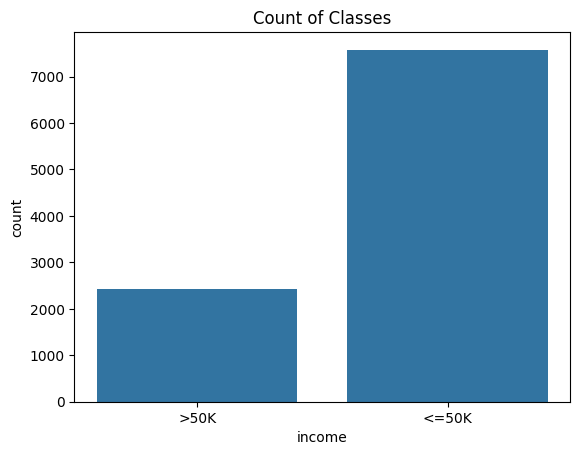

In [9]:
sns.countplot(x= 'income', data=data)
plt.title("Count of Classes")
plt.plot()

In [44]:
#Extracting input and output data
X=data.drop('income',axis=1)
y=data.iloc[:,14]

In [11]:
y

,income
0,>50K
1,<=50K
2,<=50K
3,>50K
4,<=50K
...,...
9995,<=50K
9996,<=50K
9997,<=50K
9998,>50K


In [12]:
data.isna().sum()

,0
age,0
workclass,175
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,175
relationship,0
race,0
sex,0


In [45]:
data = data.dropna()
data.shape

(9765, 15)

In [14]:
num_cols=data.select_dtypes(include='number')

In [15]:
num_cols.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,29,216481,14,0,0,40
1,36,280570,10,0,0,45
2,25,100903,13,0,0,25
3,47,145636,11,0,0,48
4,33,119422,9,0,0,40


In [16]:
cat_cols=data.select_dtypes(include='object')

In [17]:
cat_cols.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,>50K
1,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
2,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,United-States,<=50K
3,Private,Assoc-voc,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,>50K
4,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K


In [18]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in list(cat_cols):
    cat_cols[col] = le.fit_transform(cat_cols[col])

In [19]:
cat_cols.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,4,12,2,4,5,4,0,38,1
1,4,15,2,3,0,4,1,38,0
2,0,9,2,0,5,4,0,38,0
3,4,8,2,6,0,4,1,38,1
4,4,11,2,4,0,4,1,38,0


In [20]:
cat_cols.drop(columns=['native-country'],inplace=True)

In [21]:
cat_cols.head()

,workclass,education,marital-status,occupation,relationship,race,sex,income
0,4,12,2,4,5,4,0,1
1,4,15,2,3,0,4,1,0
2,0,9,2,0,5,4,0,0
3,4,8,2,6,0,4,1,1
4,4,11,2,4,0,4,1,0


In [22]:
#normalising the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols[list(num_cols)]=scaler.fit_transform(num_cols)

In [23]:
num_cols.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.164384,0.150828,0.866667,0.0,0.0,0.397959
1,0.260274,0.198167,0.600000,0.0,0.0,0.448980
2,0.109589,0.065457,0.800000,0.0,0.0,0.244898
3,0.410959,0.098499,0.666667,0.0,0.0,0.479592
4,0.219178,0.079136,0.533333,0.0,0.0,0.397959


In [25]:
data_processed = data.copy()

In [26]:
data_processed[list(num_cols)]=num_cols
data_processed[list(num_cols)].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.164384,0.150828,0.866667,0.0,0.0,0.397959
1,0.260274,0.198167,0.600000,0.0,0.0,0.448980
2,0.109589,0.065457,0.800000,0.0,0.0,0.244898
3,0.410959,0.098499,0.666667,0.0,0.0,0.479592
4,0.219178,0.079136,0.533333,0.0,0.0,0.397959


In [27]:
data_processed[list(cat_cols)]=cat_cols
data_processed[list(cat_cols)].head()

,workclass,education,marital-status,occupation,relationship,race,sex,income
0,4,12,2,4,5,4,0,1
1,4,15,2,3,0,4,1,0
2,0,9,2,0,5,4,0,0
3,4,8,2,6,0,4,1,1
4,4,11,2,4,0,4,1,0


In [47]:
data_processed.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.164384,4,0.150828,12,0.866667,2,4,5,4,0,0.0,0.0,0.397959,United-States,1
1,0.260274,4,0.198167,15,0.600000,2,3,0,4,1,0.0,0.0,0.448980,United-States,0
2,0.109589,0,0.065457,9,0.800000,2,0,5,4,0,0.0,0.0,0.244898,United-States,0
3,0.410959,4,0.098499,8,0.666667,2,6,0,4,1,0.0,0.0,0.479592,United-States,1
4,0.219178,4,0.079136,11,0.533333,2,4,0,4,1,0.0,0.0,0.397959,United-States,0


In [48]:
#Extracting input and output data
X=data_processed.drop('income',axis=1)
y=data_processed.iloc[:,-1]

In [49]:
y

,income
0,1
1,0
2,0
3,1
4,0
...,...
9995,0
9996,0
9997,0
9998,1


In [50]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [29]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [41]:
#encoding the categorical features in X
cat_cols_X = X.select_dtypes(include='object')
for col in cat_cols_X.columns:
    X[col] = le.fit_transform(X[col])

In [42]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29,4,216481,12,14,2,4,5,4,0,0,0,40,38
1,36,4,280570,15,10,2,3,0,4,1,0,0,45,38
2,25,0,100903,9,13,2,0,5,4,0,0,0,25,38
3,47,4,145636,8,11,2,6,0,4,1,0,0,48,38
4,33,4,119422,11,9,2,4,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,4,63363,15,10,4,12,3,4,0,0,0,30,38
9996,53,4,58535,11,9,0,12,1,4,0,0,0,40,38
9997,30,4,342709,11,9,2,6,0,4,1,0,0,40,38
9998,41,6,134724,8,11,2,8,5,4,0,3103,0,40,38


In [52]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [54]:
data.replace('?', np.nan, inplace=True)

In [56]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'most_frequent' for categorical
X = data.drop('income', axis=1)  # adjust as needed
y = data['income']

X = pd.get_dummies(X, drop_first=True)  # encode categorical features
X = imputer.fit_transform(X)  # fill NaNs

In [57]:
# splittig the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6835, 96)
(6835,)
(2930, 96)
(2930,)


# Classification

In [32]:
# Step 1: defining the classification models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()

In [59]:
#Step 2: training the models
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)

Text(0.5, 1.0, 'DT')

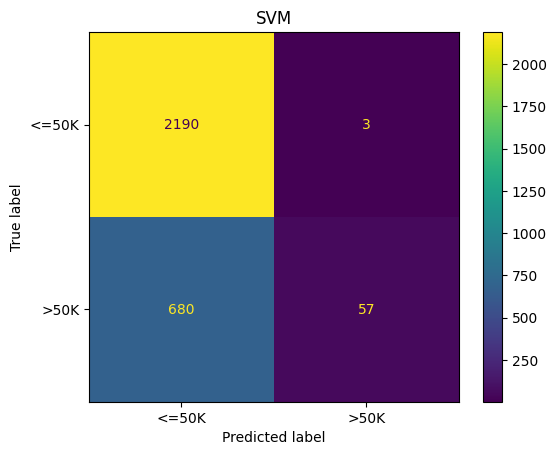

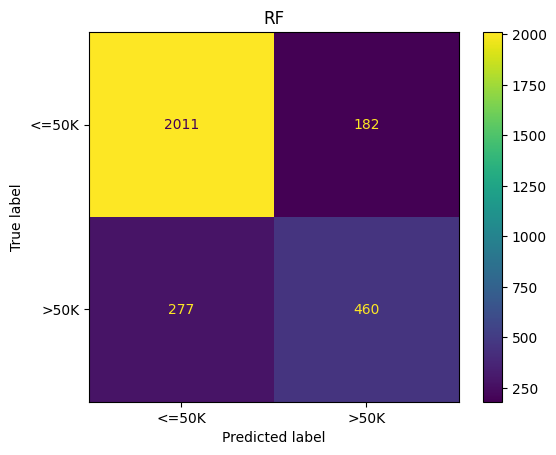

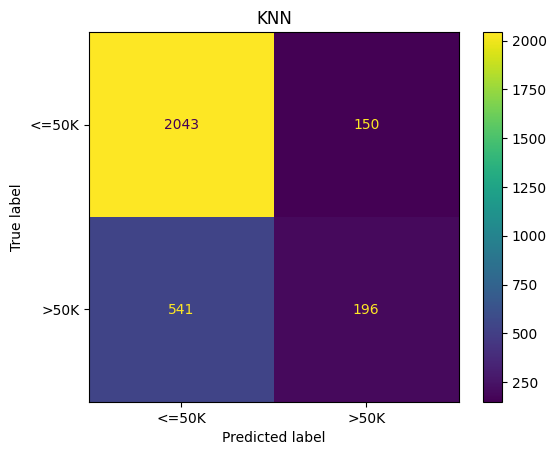

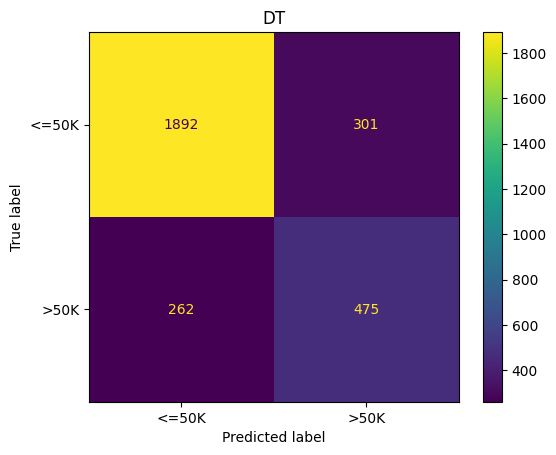

In [61]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")


In [62]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [63]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')

SVM metrics

True Positives: 57
True Negatives: 2190
False Positives: 3
False Negatives: 680
--------------------------------------------------
Accuracy: 0.77
Mis-Classification: 0.23
Sensitivity: 0.08
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.14



RF metrics

True Positives: 460
True Negatives: 2011
False Positives: 182
False Negatives: 277
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.62
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.74



KNN metrics

True Positives: 196
True Negatives: 2043
False Positives: 150
False Negatives: 541
--------------------------------------------------
Accuracy: 0.76
Mis-Classification: 0.24
Sensitivity: 0.27
Specificity: 0.93
Precision: 0.93
f_1 Score: 0.41



DT metrics

True Positives: 475
True Negatives: 1892
False Positives: 301
False Negatives: 262
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.64
Specificity: 0.86
Precision: